Defining  an  "adopted  user"   as  a  user  who   has  logged  into  the  product  on  three  separate
days  in  at  least  one  seven­day  period ,  identify  which  factors  predict  future  user
adoption .

We  suggest  spending  1-2  hours  on  this,  but  you're  welcome  to  spend  more  or  less.
Please  send  us  a  brief  writeup  of  your  findings  (the  more  concise,  the  better  ­­  no  more
than  one  page),  along  with  any  summary  tables,  graphs,  code,  or  queries  that  can  help
us  understand  your  approach.  Please  note  any  factors  you  considered  or  investigation
you  did,  even  if  they  did  not  pan  out.  Feel  free  to  identify  any  further  research  or  data
you  think  would  be  valuable.

In [25]:
import pandas as pd

userEng = pd.read_csv("C:/Users/abulh/Sync/O4_P1_SpringBoardMLCourse/Unit18/1481069814_relax_challenge/relax_challenge/takehome_user_engagement.csv")
user = pd.read_csv("C:/Users/abulh/Sync/O4_P1_SpringBoardMLCourse/Unit18/1481069814_relax_challenge/relax_challenge/takehome_users.csv", encoding = "ISO-8859-1")

In [26]:
userEng.head()

,time_stamp,user_id,visited
0,2014-04-22 03:53:30,1,1
1,2013-11-15 03:45:04,2,1
2,2013-11-29 03:45:04,2,1
3,2013-12-09 03:45:04,2,1
4,2013-12-25 03:45:04,2,1


In [27]:
user.head()

,object_id,creation_time,name,email,creation_source,last_session_creation_time,opted_in_to_mailing_list,enabled_for_marketing_drip,org_id,invited_by_user_id
0,1,2014-04-22 03:53:30,Clausen August,AugustCClausen@yahoo.com,GUEST_INVITE,1.398139e+09,1,0,11,10803.0
1,2,2013-11-15 03:45:04,Poole Matthew,MatthewPoole@gustr.com,ORG_INVITE,1.396238e+09,0,0,1,316.0
2,3,2013-03-19 23:14:52,Bottrill Mitchell,MitchellBottrill@gustr.com,ORG_INVITE,1.363735e+09,0,0,94,1525.0
3,4,2013-05-21 08:09:28,Clausen Nicklas,NicklasSClausen@yahoo.com,GUEST_INVITE,1.369210e+09,0,0,1,5151.0
4,5,2013-01-17 10:14:20,Raw Grace,GraceRaw@yahoo.com,GUEST_INVITE,1.358850e+09,0,0,193,5240.0


In [28]:
userEng["time_stamp"] = pd.to_datetime(userEng["time_stamp"])
userEng['year'] = userEng['time_stamp'].dt.year
userEng['month'] = userEng['time_stamp'].dt.month
userEng['day'] = userEng['time_stamp'].dt.day
userEng['week'] = userEng['time_stamp'].dt.week

In [29]:
userEng.head()

,time_stamp,user_id,visited,year,month,day,week
0,2014-04-22 03:53:30,1,1,2014,4,22,17
1,2013-11-15 03:45:04,2,1,2013,11,15,46
2,2013-11-29 03:45:04,2,1,2013,11,29,48
3,2013-12-09 03:45:04,2,1,2013,12,9,50
4,2013-12-25 03:45:04,2,1,2013,12,25,52


In [32]:
userEng_week = userEng.groupby(["user_id", "year", "month", "day", "week"]).agg("count").reset_index()
userEng_week

,user_id,year,month,day,week,time_stamp,visited
0,1,2014,4,22,17,1,1
1,2,2013,11,15,46,1,1
2,2,2013,11,29,48,1,1
3,2,2013,12,9,50,1,1
4,2,2013,12,25,52,1,1
...,...,...,...,...,...,...,...
207912,11996,2013,9,6,36,1,1
207913,11997,2013,1,15,3,1,1
207914,11998,2014,4,27,17,1,1
207915,11999,2012,6,2,22,1,1


In [35]:
userEng_weeksum = userEng_week.groupby(["user_id", "year", "month", "week"])["day"].agg("count").reset_index()
userEng_weeksum

,user_id,year,month,week,day
0,1,2014,4,17,1
1,2,2013,11,46,1
2,2,2013,11,48,1
3,2,2013,12,1,1
4,2,2013,12,50,1
...,...,...,...,...,...
75928,11996,2013,9,36,1
75929,11997,2013,1,3,1
75930,11998,2014,4,17,1
75931,11999,2012,6,22,1


In [41]:
adopted_user = userEng_weeksum[userEng_weeksum["day"]>=3].groupby("user_id").agg("count").reset_index()[["user_id", "year"]]
adopted_user.columns = ["object_id", "freqofAdap"]
adopted_user

,object_id,freqofAdap
0,2,1
1,10,51
2,20,1
3,33,1
4,42,66
...,...,...
1411,11965,1
1412,11967,7
1413,11969,21
1414,11975,43


In [83]:
user_new = user.merge(adopted_user, on = "object_id", how = "left")
user_new["freqofAdap"] = user_new["freqofAdap"].fillna("0")
user_new

,object_id,creation_time,name,email,creation_source,last_session_creation_time,opted_in_to_mailing_list,enabled_for_marketing_drip,org_id,invited_by_user_id,freqofAdap
0,1,2014-04-22 03:53:30,Clausen August,AugustCClausen@yahoo.com,GUEST_INVITE,1.398139e+09,1,0,11,10803.0,0
1,2,2013-11-15 03:45:04,Poole Matthew,MatthewPoole@gustr.com,ORG_INVITE,1.396238e+09,0,0,1,316.0,1
2,3,2013-03-19 23:14:52,Bottrill Mitchell,MitchellBottrill@gustr.com,ORG_INVITE,1.363735e+09,0,0,94,1525.0,0
3,4,2013-05-21 08:09:28,Clausen Nicklas,NicklasSClausen@yahoo.com,GUEST_INVITE,1.369210e+09,0,0,1,5151.0,0
4,5,2013-01-17 10:14:20,Raw Grace,GraceRaw@yahoo.com,GUEST_INVITE,1.358850e+09,0,0,193,5240.0,0
...,...,...,...,...,...,...,...,...,...,...,...
11995,11996,2013-09-06 06:14:15,Meier Sophia,SophiaMeier@gustr.com,ORG_INVITE,1.378448e+09,0,0,89,8263.0,0
11996,11997,2013-01-10 18:28:37,Fisher Amelie,AmelieFisher@gmail.com,SIGNUP_GOOGLE_AUTH,1.358275e+09,0,0,200,NaN,0
11997,11998,2014-04-27 12:45:16,Haynes Jake,JakeHaynes@cuvox.de,GUEST_INVITE,1.398603e+09,1,1,83,8074.0,0
11998,11999,2012-05-31 11:55:59,Faber Annett,mhaerzxp@iuxiw.com,PERSONAL_PROJECTS,1.338638e+09,0,0,6,NaN,0


In [84]:
#if invited by other user, turn that column into 1 and 0
user_new.loc[user_new['invited_by_user_id'].isna(), 'invitedYN'] = int(0)
user_new.loc[user_new['invited_by_user_id'].notna(), 'invitedYN'] = int(1)
user_new["invitedYN"] = user_new["invitedYN"].astype(int)
user_new

,object_id,creation_time,name,email,creation_source,last_session_creation_time,opted_in_to_mailing_list,enabled_for_marketing_drip,org_id,invited_by_user_id,freqofAdap,invitedYN
0,1,2014-04-22 03:53:30,Clausen August,AugustCClausen@yahoo.com,GUEST_INVITE,1.398139e+09,1,0,11,10803.0,0,1
1,2,2013-11-15 03:45:04,Poole Matthew,MatthewPoole@gustr.com,ORG_INVITE,1.396238e+09,0,0,1,316.0,1,1
2,3,2013-03-19 23:14:52,Bottrill Mitchell,MitchellBottrill@gustr.com,ORG_INVITE,1.363735e+09,0,0,94,1525.0,0,1
3,4,2013-05-21 08:09:28,Clausen Nicklas,NicklasSClausen@yahoo.com,GUEST_INVITE,1.369210e+09,0,0,1,5151.0,0,1
4,5,2013-01-17 10:14:20,Raw Grace,GraceRaw@yahoo.com,GUEST_INVITE,1.358850e+09,0,0,193,5240.0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...
11995,11996,2013-09-06 06:14:15,Meier Sophia,SophiaMeier@gustr.com,ORG_INVITE,1.378448e+09,0,0,89,8263.0,0,1
11996,11997,2013-01-10 18:28:37,Fisher Amelie,AmelieFisher@gmail.com,SIGNUP_GOOGLE_AUTH,1.358275e+09,0,0,200,NaN,0,0
11997,11998,2014-04-27 12:45:16,Haynes Jake,JakeHaynes@cuvox.de,GUEST_INVITE,1.398603e+09,1,1,83,8074.0,0,1
11998,11999,2012-05-31 11:55:59,Faber Annett,mhaerzxp@iuxiw.com,PERSONAL_PROJECTS,1.338638e+09,0,0,6,NaN,0,0


In [85]:
#Format categorical data for regression
user_new['creation_source'] = user_new['creation_source'].astype('category')
dum_creation_source = pd.get_dummies(user_new["creation_source"], columns=["creation_source"], prefix="creation_source" )
user_new = user_new.join(dum_creation_source)
user_new

,object_id,creation_time,name,email,creation_source,last_session_creation_time,opted_in_to_mailing_list,enabled_for_marketing_drip,org_id,invited_by_user_id,freqofAdap,invitedYN,creation_source_GUEST_INVITE,creation_source_ORG_INVITE,creation_source_PERSONAL_PROJECTS,creation_source_SIGNUP,creation_source_SIGNUP_GOOGLE_AUTH
0,1,2014-04-22 03:53:30,Clausen August,AugustCClausen@yahoo.com,GUEST_INVITE,1.398139e+09,1,0,11,10803.0,0,1,1,0,0,0,0
1,2,2013-11-15 03:45:04,Poole Matthew,MatthewPoole@gustr.com,ORG_INVITE,1.396238e+09,0,0,1,316.0,1,1,0,1,0,0,0
2,3,2013-03-19 23:14:52,Bottrill Mitchell,MitchellBottrill@gustr.com,ORG_INVITE,1.363735e+09,0,0,94,1525.0,0,1,0,1,0,0,0
3,4,2013-05-21 08:09:28,Clausen Nicklas,NicklasSClausen@yahoo.com,GUEST_INVITE,1.369210e+09,0,0,1,5151.0,0,1,1,0,0,0,0
4,5,2013-01-17 10:14:20,Raw Grace,GraceRaw@yahoo.com,GUEST_INVITE,1.358850e+09,0,0,193,5240.0,0,1,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11995,11996,2013-09-06 06:14:15,Meier Sophia,SophiaMeier@gustr.com,ORG_INVITE,1.378448e+09,0,0,89,8263.0,0,1,0,1,0,0,0
11996,11997,2013-01-10 18:28:37,Fisher Amelie,AmelieFisher@gmail.com,SIGNUP_GOOGLE_AUTH,1.358275e+09,0,0,200,NaN,0,0,0,0,0,0,1
11997,11998,2014-04-27 12:45:16,Haynes Jake,JakeHaynes@cuvox.de,GUEST_INVITE,1.398603e+09,1,1,83,8074.0,0,1,1,0,0,0,0
11998,11999,2012-05-31 11:55:59,Faber Annett,mhaerzxp@iuxiw.com,PERSONAL_PROJECTS,1.338638e+09,0,0,6,NaN,0,0,0,0,1,0,0


In [86]:
#Format categorical data for regression
user_new['org_id'] = user_new['org_id'].astype('category')
dum_org_id = pd.get_dummies(user_new["org_id"], columns=["org_id"], prefix="org_id" )
user_new = user_new.join(dum_org_id)
user_new

,object_id,creation_time,name,email,creation_source,last_session_creation_time,opted_in_to_mailing_list,enabled_for_marketing_drip,org_id,invited_by_user_id,...,org_id_407,org_id_408,org_id_409,org_id_410,org_id_411,org_id_412,org_id_413,org_id_414,org_id_415,org_id_416
0,1,2014-04-22 03:53:30,Clausen August,AugustCClausen@yahoo.com,GUEST_INVITE,1.398139e+09,1,0,11,10803.0,...,0,0,0,0,0,0,0,0,0,0
1,2,2013-11-15 03:45:04,Poole Matthew,MatthewPoole@gustr.com,ORG_INVITE,1.396238e+09,0,0,1,316.0,...,0,0,0,0,0,0,0,0,0,0
2,3,2013-03-19 23:14:52,Bottrill Mitchell,MitchellBottrill@gustr.com,ORG_INVITE,1.363735e+09,0,0,94,1525.0,...,0,0,0,0,0,0,0,0,0,0
3,4,2013-05-21 08:09:28,Clausen Nicklas,NicklasSClausen@yahoo.com,GUEST_INVITE,1.369210e+09,0,0,1,5151.0,...,0,0,0,0,0,0,0,0,0,0
4,5,2013-01-17 10:14:20,Raw Grace,GraceRaw@yahoo.com,GUEST_INVITE,1.358850e+09,0,0,193,5240.0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11995,11996,2013-09-06 06:14:15,Meier Sophia,SophiaMeier@gustr.com,ORG_INVITE,1.378448e+09,0,0,89,8263.0,...,0,0,0,0,0,0,0,0,0,0
11996,11997,2013-01-10 18:28:37,Fisher Amelie,AmelieFisher@gmail.com,SIGNUP_GOOGLE_AUTH,1.358275e+09,0,0,200,NaN,...,0,0,0,0,0,0,0,0,0,0
11997,11998,2014-04-27 12:45:16,Haynes Jake,JakeHaynes@cuvox.de,GUEST_INVITE,1.398603e+09,1,1,83,8074.0,...,0,0,0,0,0,0,0,0,0,0
11998,11999,2012-05-31 11:55:59,Faber Annett,mhaerzxp@iuxiw.com,PERSONAL_PROJECTS,1.338638e+09,0,0,6,NaN,...,0,0,0,0,0,0,0,0,0,0


In [64]:
list(user_new.columns)

['object_id',
 'creation_time',
 'name',
 'email',
 'creation_source',
 'last_session_creation_time',
 'opted_in_to_mailing_list',
 'enabled_for_marketing_drip',
 'org_id',
 'invited_by_user_id',
 'freqofAdap',
 'invitedYN',
 'creation_source_GUEST_INVITE',
 'creation_source_ORG_INVITE',
 'creation_source_PERSONAL_PROJECTS',
 'creation_source_SIGNUP',
 'creation_source_SIGNUP_GOOGLE_AUTH',
 'org_id_0',
 'org_id_1',
 'org_id_2',
 'org_id_3',
 'org_id_4',
 'org_id_5',
 'org_id_6',
 'org_id_7',
 'org_id_8',
 'org_id_9',
 'org_id_10',
 'org_id_11',
 'org_id_12',
 'org_id_13',
 'org_id_14',
 'org_id_15',
 'org_id_16',
 'org_id_17',
 'org_id_18',
 'org_id_19',
 'org_id_20',
 'org_id_21',
 'org_id_22',
 'org_id_23',
 'org_id_24',
 'org_id_25',
 'org_id_26',
 'org_id_27',
 'org_id_28',
 'org_id_29',
 'org_id_30',
 'org_id_31',
 'org_id_32',
 'org_id_33',
 'org_id_34',
 'org_id_35',
 'org_id_36',
 'org_id_37',
 'org_id_38',
 'org_id_39',
 'org_id_40',
 'org_id_41',
 'org_id_42',
 'org_id_43',
 

In [111]:
x = user_new[[
         'opted_in_to_mailing_list',
         'enabled_for_marketing_drip',
         'invitedYN',
         'creation_source_GUEST_INVITE',
         'creation_source_ORG_INVITE',
         'creation_source_PERSONAL_PROJECTS',
         'creation_source_SIGNUP',
         'creation_source_SIGNUP_GOOGLE_AUTH',
         'org_id_0',
         'org_id_1',
         'org_id_2',
         'org_id_3',
         'org_id_4',
         'org_id_5',
         'org_id_6',
         'org_id_7',
         'org_id_8',
         'org_id_9',
         'org_id_10',
         'org_id_11',
         'org_id_12',
         'org_id_13',
         'org_id_14',
         'org_id_15',
         'org_id_16',
         'org_id_17',
         'org_id_18',
         'org_id_19',
         'org_id_20',
         'org_id_21',
         'org_id_22',
         'org_id_23',
         'org_id_24',
         'org_id_25',
         'org_id_26',
         'org_id_27',
         'org_id_28',
         'org_id_29',
         'org_id_30',
         'org_id_31',
         'org_id_32',
         'org_id_33',
         'org_id_34',
         'org_id_35',
         'org_id_36',
         'org_id_37',
         'org_id_38',
         'org_id_39',
         'org_id_40',
         'org_id_41',
         'org_id_42',
         'org_id_43',
         'org_id_44',
         'org_id_45',
         'org_id_46',
         'org_id_47',
         'org_id_48',
         'org_id_49',
         'org_id_50',
         'org_id_51',
         'org_id_52',
         'org_id_53',
         'org_id_54',
         'org_id_55',
         'org_id_56',
         'org_id_57',
         'org_id_58',
         'org_id_59',
         'org_id_60',
         'org_id_61',
         'org_id_62',
         'org_id_63',
         'org_id_64',
         'org_id_65',
         'org_id_66',
         'org_id_67',
         'org_id_68',
         'org_id_69',
         'org_id_70',
         'org_id_71',
         'org_id_72',
         'org_id_73',
         'org_id_74',
         'org_id_75',
         'org_id_76',
         'org_id_77',
         'org_id_78',
         'org_id_79',
         'org_id_80',
         'org_id_81',
         'org_id_82',
         'org_id_83',
         'org_id_84',
         'org_id_85',
         'org_id_86',
         'org_id_87',
         'org_id_88',
         'org_id_89',
         'org_id_90',
         'org_id_91',
         'org_id_92',
         'org_id_93',
         'org_id_94',
         'org_id_95',
         'org_id_96',
         'org_id_97',
         'org_id_98',
         'org_id_99',
         'org_id_100',
         'org_id_101',
         'org_id_102',
         'org_id_103',
         'org_id_104',
         'org_id_105',
         'org_id_106',
         'org_id_107',
         'org_id_108',
         'org_id_109',
         'org_id_110',
         'org_id_111',
         'org_id_112',
         'org_id_113',
         'org_id_114',
         'org_id_115',
         'org_id_116',
         'org_id_117',
         'org_id_118',
         'org_id_119',
         'org_id_120',
         'org_id_121',
         'org_id_122',
         'org_id_123',
         'org_id_124',
         'org_id_125',
         'org_id_126',
         'org_id_127',
         'org_id_128',
         'org_id_129',
         'org_id_130',
         'org_id_131',
         'org_id_132',
         'org_id_133',
         'org_id_134',
         'org_id_135',
         'org_id_136',
         'org_id_137',
         'org_id_138',
         'org_id_139',
         'org_id_140',
         'org_id_141',
         'org_id_142',
         'org_id_143',
         'org_id_144',
         'org_id_145',
         'org_id_146',
         'org_id_147',
         'org_id_148',
         'org_id_149',
         'org_id_150',
         'org_id_151',
         'org_id_152',
         'org_id_153',
         'org_id_154',
         'org_id_155',
         'org_id_156',
         'org_id_157',
         'org_id_158',
         'org_id_159',
         'org_id_160',
         'org_id_161',
         'org_id_162',
         'org_id_163',
         'org_id_164',
         'org_id_165',
         'org_id_166',
         'org_id_167',
         'org_id_168',
         'org_id_169',
         'org_id_170',
         'org_id_171',
         'org_id_172',
         'org_id_173',
         'org_id_174',
         'org_id_175',
         'org_id_176',
         'org_id_177',
         'org_id_178',
         'org_id_179',
         'org_id_180',
         'org_id_181',
         'org_id_182',
         'org_id_183',
         'org_id_184',
         'org_id_185',
         'org_id_186',
         'org_id_187',
         'org_id_188',
         'org_id_189',
         'org_id_190',
         'org_id_191',
         'org_id_192',
         'org_id_193',
         'org_id_194',
         'org_id_195',
         'org_id_196',
         'org_id_197',
         'org_id_198',
         'org_id_199',
         'org_id_200',
         'org_id_201',
         'org_id_202',
         'org_id_203',
         'org_id_204',
         'org_id_205',
         'org_id_206',
         'org_id_207',
         'org_id_208',
         'org_id_209',
         'org_id_210',
         'org_id_211',
         'org_id_212',
         'org_id_213',
         'org_id_214',
         'org_id_215',
         'org_id_216',
         'org_id_217',
         'org_id_218',
         'org_id_219',
         'org_id_220',
         'org_id_221',
         'org_id_222',
         'org_id_223',
         'org_id_224',
         'org_id_225',
         'org_id_226',
         'org_id_227',
         'org_id_228',
         'org_id_229',
         'org_id_230',
         'org_id_231',
         'org_id_232',
         'org_id_233',
         'org_id_234',
         'org_id_235',
         'org_id_236',
         'org_id_237',
         'org_id_238',
         'org_id_239',
         'org_id_240',
         'org_id_241',
         'org_id_242',
         'org_id_243',
         'org_id_244',
         'org_id_245',
         'org_id_246',
         'org_id_247',
         'org_id_248',
         'org_id_249',
         'org_id_250',
         'org_id_251',
         'org_id_252',
         'org_id_253',
         'org_id_254',
         'org_id_255',
         'org_id_256',
         'org_id_257',
         'org_id_258',
         'org_id_259',
         'org_id_260',
         'org_id_261',
         'org_id_262',
         'org_id_263',
         'org_id_264',
         'org_id_265',
         'org_id_266',
         'org_id_267',
         'org_id_268',
         'org_id_269',
         'org_id_270',
         'org_id_271',
         'org_id_272',
         'org_id_273',
         'org_id_274',
         'org_id_275',
         'org_id_276',
         'org_id_277',
         'org_id_278',
         'org_id_279',
         'org_id_280',
         'org_id_281',
         'org_id_282',
         'org_id_283',
         'org_id_284',
         'org_id_285',
         'org_id_286',
         'org_id_287',
         'org_id_288',
         'org_id_289',
         'org_id_290',
         'org_id_291',
         'org_id_292',
         'org_id_293',
         'org_id_294',
         'org_id_295',
         'org_id_296',
         'org_id_297',
         'org_id_298',
         'org_id_299',
         'org_id_300',
         'org_id_301',
         'org_id_302',
         'org_id_303',
         'org_id_304',
         'org_id_305',
         'org_id_306',
         'org_id_307',
         'org_id_308',
         'org_id_309',
         'org_id_310',
         'org_id_311',
         'org_id_312',
         'org_id_313',
         'org_id_314',
         'org_id_315',
         'org_id_316',
         'org_id_317',
         'org_id_318',
         'org_id_319',
         'org_id_320',
         'org_id_321',
         'org_id_322',
         'org_id_323',
         'org_id_324',
         'org_id_325',
         'org_id_326',
         'org_id_327',
         'org_id_328',
         'org_id_329',
         'org_id_330',
         'org_id_331',
         'org_id_332',
         'org_id_333',
         'org_id_334',
         'org_id_335',
         'org_id_336',
         'org_id_337',
         'org_id_338',
         'org_id_339',
         'org_id_340',
         'org_id_341',
         'org_id_342',
         'org_id_343',
         'org_id_344',
         'org_id_345',
         'org_id_346',
         'org_id_347',
         'org_id_348',
         'org_id_349',
         'org_id_350',
         'org_id_351',
         'org_id_352',
         'org_id_353',
         'org_id_354',
         'org_id_355',
         'org_id_356',
         'org_id_357',
         'org_id_358',
         'org_id_359',
         'org_id_360',
         'org_id_361',
         'org_id_362',
         'org_id_363',
         'org_id_364',
         'org_id_365',
         'org_id_366',
         'org_id_367',
         'org_id_368',
         'org_id_369',
         'org_id_370',
         'org_id_371',
         'org_id_372',
         'org_id_373',
         'org_id_374',
         'org_id_375',
         'org_id_376',
         'org_id_377',
         'org_id_378',
         'org_id_379',
         'org_id_380',
         'org_id_381',
         'org_id_382',
         'org_id_383',
         'org_id_384',
         'org_id_385',
         'org_id_386',
         'org_id_387',
         'org_id_388',
         'org_id_389',
         'org_id_390',
         'org_id_391',
         'org_id_392',
         'org_id_393',
         'org_id_394',
         'org_id_395',
         'org_id_396',
         'org_id_397',
         'org_id_398',
         'org_id_399',
         'org_id_400',
         'org_id_401',
         'org_id_402',
         'org_id_403',
         'org_id_404',
         'org_id_405',
         'org_id_406',
         'org_id_407',
         'org_id_408',
         'org_id_409',
         'org_id_410',
         'org_id_411',
         'org_id_412',
         'org_id_413',
         'org_id_414',
         'org_id_415',
         'org_id_416']]

In [104]:
y = np.asarray(user_new['freqofAdap'])


array(['0', 1.0, '0', ..., '0', '0', '0'], dtype=object)

In [113]:
import numpy as np
from sklearn.linear_model import LinearRegression

reg = LinearRegression().fit(x, y)

reg.coef_


array([ 1.09144917e-01, -5.32136900e-02,  2.28521368e+13, -1.08842861e+13,
       -1.08842861e+13,  1.19678506e+13,  1.19678506e+13,  1.19678506e+13,
        1.15408835e+12,  1.15408835e+12,  1.15408835e+12,  1.15408835e+12,
        1.15408835e+12,  1.15408835e+12,  1.15408835e+12,  1.15408835e+12,
        1.15408835e+12,  1.15408835e+12,  1.15408835e+12,  1.15408835e+12,
        1.15408835e+12,  1.15408835e+12,  1.15408835e+12,  1.15408835e+12,
        1.15408835e+12,  1.15408835e+12,  1.15408835e+12,  1.15408835e+12,
        1.15408835e+12,  1.15408835e+12,  1.15408835e+12,  1.15408835e+12,
        1.15408835e+12,  1.15408835e+12,  1.15408835e+12,  1.15408835e+12,
        1.15408835e+12,  1.15408835e+12,  1.15408835e+12,  1.15408835e+12,
        1.15408835e+12,  1.15408835e+12,  1.15408835e+12,  1.15408835e+12,
        1.15408835e+12,  1.15408835e+12,  1.15408835e+12,  1.15408835e+12,
        1.15408835e+12,  1.15408835e+12,  1.15408835e+12,  1.15408835e+12,
        1.15408835e+12,  

Based on the above analysis, site does not play a substantial impact so I will remove them from the model

In [114]:
x = user_new[[
         'opted_in_to_mailing_list',
         'enabled_for_marketing_drip',
         'invitedYN',
         'creation_source_GUEST_INVITE',
         'creation_source_ORG_INVITE',
         'creation_source_PERSONAL_PROJECTS',
         'creation_source_SIGNUP',
         'creation_source_SIGNUP_GOOGLE_AUTH']]

In [115]:
import numpy as np
from sklearn.linear_model import LinearRegression

reg = LinearRegression().fit(x, y)

reg.coef_

array([ 1.44721553e-01, -6.75277714e-02,  6.70939462e+12, -6.04568457e+12,
       -6.04568457e+12,  6.63710056e+11,  6.63710056e+11,  6.63710056e+11])

Based on the reduced mode, it appears that some factors increase the changes that the user will be adarped where as others are associated with the reduced behaviour. 
Here we can see that opting in to the mailing list increases the chance the user has adapted. Where as enabling the marketing drip, reduces their adaptibility. But the visual evidence appears to be a bit weak, so I will use a visial representation to see if the model is consistent. 

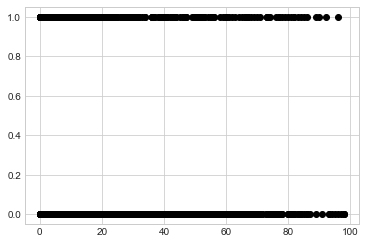

In [122]:
%matplotlib inline
import matplotlib.pyplot as plt
plt.style.use('seaborn-whitegrid')
plt.plot(user_new["freqofAdap"].astype(int), user_new["opted_in_to_mailing_list"], 'o', color='black')

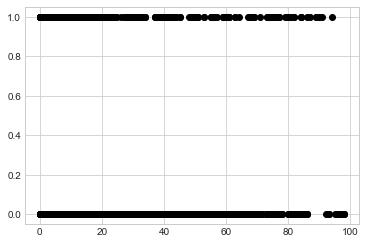

In [125]:
%matplotlib inline
import matplotlib.pyplot as plt
plt.style.use('seaborn-whitegrid')
plt.plot(user_new["freqofAdap"].astype(int), user_new["creation_source_GUEST_INVITE"], 'o', color='black')

Based on the above graphs, the relationships appear to be weak but present and consistent with my previous model findings.